In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys

In [ ]:
#from sklearn.preprocessing import StandardScaler

# Fashion MNIST

fashion_mnist = tf.keras.datasets.fashion_mnist

(images_train, targets_train), (images_test, targets_test) = tf.keras.datasets.fashion_mnist.load_data()

print(images_train.shape)
print(targets_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


In [ ]:
targets_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

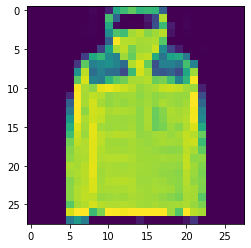

In [ ]:
plt.imshow(images_train[726])

In [ ]:
targets_names = ["T-shirt", "Pantalon", "Pull", "Robe", "Manteau", "Sandale", 
                 "Chemise", "Sneaker", "Sac", "Bottes"]

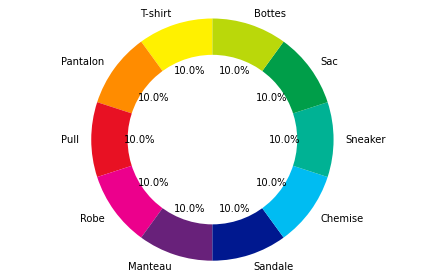

In [ ]:
labels = targets_names
sizes = np.unique(targets_train,return_counts=True)[1]

#colors
colors = ['#fff100','#ff8c00','#e81123','#ec008c','#68217a','#00188f',
          '#00bcf2','#00b294','#009e49','#bad80a']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
images_train = images_train.reshape(-1,28,28,1)
images_test = images_test.reshape(-1,28,28,1)

In [ ]:
images_train = images_train.astype('float')/255
images_test = images_test.astype('float')/255

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))

model.add(tf.keras.layers.Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(256, 
                 kernel_size=(3, 3), 
                 activation='relu'))

model.add(tf.keras.layers.Conv2D(256, 
                 kernel_size=(3, 3), 
                 activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
    )

In [ ]:
history = model.fit(images_train,
                    targets_train,
                    epochs=15,
                    validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 25s 17ms/step - loss: 0.5254 - accuracy: 0.8078 - val_loss: 0.3303 - val_accuracy: 0.8753
Epoch 2/15
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3317 - accuracy: 0.8800 - val_loss: 0.3147 - val_accuracy: 0.8805
Epoch 3/15
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2888 - accuracy: 0.8952 - val_loss: 0.2445 - val_accuracy: 0.9112
Epoch 4/15
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2586 - accuracy: 0.9057 - val_loss: 0.2433 - val_accuracy: 0.9118
Epoch 5/15
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2405 - accuracy: 0.9125 - val_loss: 0.2344 - val_accuracy: 0.9174
Epoch 6/15
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2252 - accuracy: 0.9176 - val_loss: 0.2275 - val_accuracy: 0.9165
Epoch 7/15
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2074 - accuracy: 0.9240 - val_loss: 0.2175 -

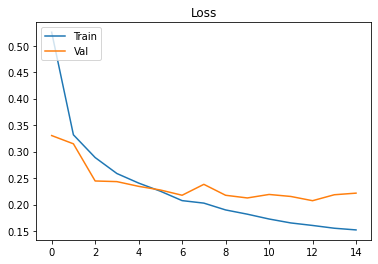

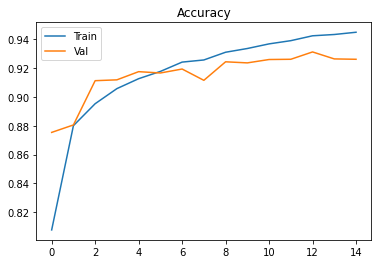

In [ ]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [ ]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.2409 - accuracy: 0.9246
Test Loss 0.2408551722764969
Test Accuracy 0.9246000051498413
